<a href="https://colab.research.google.com/github/redcarrott/CaravanHealth-HW/blob/main/binary_image_classifier(PyTorch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

adapted from https://towardsdatascience.com/binary-image-classification-in-pytorch-5adf64f8c781

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/My Drive/[w210] Capstone Project/NIH_images/mass_nf_merged.csv')
target_files = data['Image Index'].to_list()
print(len(target_files))
data

252


,Unnamed: 0,Image Index,Finding Label,x,y,w,h
0,35037,00009237_029.png,No Finding,0.000000,0.000000,0.000000,0.000000
1,26889,00007019_002.png,No Finding,0.000000,0.000000,0.000000,0.000000
2,43656,00011240_001.png,No Finding,0.000000,0.000000,0.000000,0.000000
3,111191,00030354_001.png,No Finding,0.000000,0.000000,0.000000,0.000000
4,39013,00010209_000.png,No Finding,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
247,157,00028698_001.png,Mass,850.488889,404.233490,61.440000,169.528889
248,160,00029105_015.png,Mass,228.639153,428.021164,120.279365,122.446561
249,161,00029469_007.png,Mass,844.122751,524.461376,161.456085,193.964021
250,163,00029579_005.png,Mass,609.280000,189.193490,73.955556,71.680000


In [ ]:
data.groupby('Finding Label')['Image Index'].nunique()

Finding Label
Mass           84
No Finding    168
Name: Image Index, dtype: int64

In [ ]:
if data.loc[data['Image Index'] == '00009237_029.png', 'Finding Label'].iloc[0] == 'No Finding':
  print('hi')

hi


In [ ]:
import os
# os.listdir(TRAIN_DESTINATION_mass)

In [ ]:
## Subfolders (Mass, NF) in train + test folders ##
import os
import numpy as np
import shutil

PATH = '/content/drive/My Drive/[w210] Capstone Project/'
TRAIN_DESTINATION_mass = PATH + 'AJ/Mass_and_NF/train/mass/'
TRAIN_DESTINATION_nf = PATH + 'AJ/Mass_and_NF/train/n f/'
TEST_DESTINATION_mass = PATH + 'AJ/Mass_and_NF/test/mass/'
TEST_DESTINATION_nf = PATH + 'AJ/Mass_and_NF/test/nf/'

for number in range(1, 10): # NIH folder images_001 - 009 
  number = str(number)
  for filename in os.listdir(PATH + 'NIH_images/images_00' + number):
    if filename in target_files:
      if filename not in os.listdir(TRAIN_DESTINATION_mass) + os.listdir(TRAIN_DESTINATION_nf) + os.listdir(TEST_DESTINATION_mass) + os.listdir(TEST_DESTINATION_nf):
        if data.loc[data['Image Index'] == filename, 'Finding Label'].iloc[0] == 'No Finding': 
          # put in test with 20%
          if np.random.random() < 0.2:
            shutil.copy(PATH + 'NIH_images/images_00' + number + '/' + filename, TEST_DESTINATION_nf + filename)
          else:
            shutil.copy(PATH + 'NIH_images/images_00' + number + '/' + filename, TRAIN_DESTINATION_nf + filename)
        if data.loc[data['Image Index'] == filename, 'Finding Label'].iloc[0] == 'Mass':
          # put in test with 20%
          if np.random.random() < 0.2:
            shutil.copy(PATH + 'NIH_images/images_00' + number + '/' + filename, TEST_DESTINATION_mass + filename)
          else:
            shutil.copy(PATH + 'NIH_images/images_00' + number + '/' + filename, TRAIN_DESTINATION_mass + filename)


...

In [ ]:
PATH = '/content/drive/My Drive/[w210] Capstone Project/'
mass_TRAIN = PATH + 'AJ/Mass_and_NF/train/mass/'
nf_TRAIN = PATH + 'AJ/Mass_and_NF/train/nf/'

Plot some image examples.

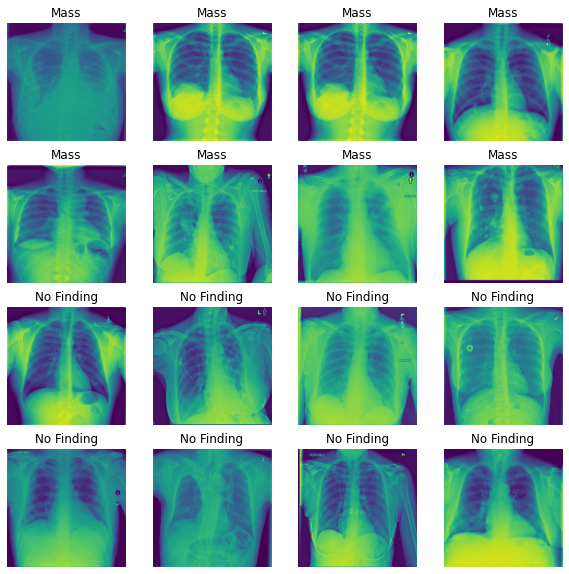

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

from IPython.core.pylabtools import figsize

samples_mass = [os.path.join(mass_TRAIN,np.random.choice(os.listdir(mass_TRAIN),1)[0]) for _ in range(8)]
samples_nf = [os.path.join(nf_TRAIN,np.random.choice(os.listdir(nf_TRAIN),1)[0]) for _ in range(8)]

nrows = 4
ncols = 4

fig, ax = plt.subplots(nrows,ncols,figsize = (10,10))
ax = ax.flatten()

for i in range(nrows*ncols):
  if i < 8:
    pic = plt.imread(samples_mass[i%8])
    ax[i].imshow(pic)
    ax[i].set_axis_off()
    ax[i].title.set_text('Mass')
  else:
    pic = plt.imread(samples_nf[i%8])
    ax[i].imshow(pic)
    ax[i].set_axis_off()
    ax[i].title.set_text('No Finding')
plt.show()

In [ ]:
train_data_sample = datasets.ImageFolder(traindir,transform=train_transforms)
train_data_sample[10]

my_img, _ = train_data_sample[10]
results = transforms.ToPILImage()(my_img)
results.show()

In [ ]:
## Create Dataloaders ##
""" Now we are going to do 3 things:
1) Let’s preprocess our data using the compose method, which is a simple method 
to apply multiple preprocessing functions like normalization and data augmentation to our dataset.
2) Let’s use ImageFolder to create a pytorch dataset. PyTorch infers the class 
automatically if the subdirectories structure is well defined (as in our case).
3) Use the DataLoader to slice our data in batches. """

import torch
import torchvision
from torchvision import datasets, transforms

traindir = PATH + "/AJ/Mass_and_NF/train/"
testdir = PATH + "/AJ/Mass_and_NF/test/" 

#use imagenet mean,std for normalization
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

#transformations
train_transforms = transforms.Compose([transforms.RandomHorizontalFlip(), 
                                       transforms.Resize((224,224)), 
                                       transforms.RandomCrop(224), 
                                       transforms.ToTensor(),                                
                                       torchvision.transforms.Normalize(mean, std)])
test_transforms = transforms.Compose([transforms.Resize((224,224)), 
                                      transforms.CenterCrop(224), 
                                      transforms.ToTensor(),
                                      torchvision.transforms.Normalize(mean, std)])

#datasets
train_data = datasets.ImageFolder(traindir,transform=train_transforms)
test_data = datasets.ImageFolder(testdir,transform=test_transforms)

#dataloader
trainloader = torch.utils.data.DataLoader(train_data, shuffle = True, batch_size=16)
testloader = torch.utils.data.DataLoader(test_data, shuffle = True, batch_size=16)


In [ ]:
## Train step function ##
"""input: model, optimizer, loss function
  return: train step fxn"""

def make_train_step(model, optimizer, loss_fn):
  def train_step(x,y):
    #make prediction
    yhat = model(x)
    #enter train mode
    model.train()
    #compute loss
    loss = loss_fn(yhat,y)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    #optimizer.cleargrads()

    return loss, (yhat>0.5).float()
  return train_step

In [ ]:
## Pretrained model ## 
"""a) download pretrained model (resnet) + freeze all parameters 
   b) change last linear layer (to cutomize model as binary classifier)
   c) model + data must be on the same device (GPU) !! """

from torchvision import datasets, models, transforms
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"
model = models.densenet121(pretrained=True) # changed from resnet18 to densenet121

## OLD resnet18 model ##
#freeze all params
#for params in model.parameters():
  #params.requires_grad_ = False

#add a new final layer
#nr_filters = model.fc.in_features  #number of input features of last layer
#model.fc = nn.Linear(nr_filters, 1)

num_ftrs = model.classifier.in_features
    # add final layer with # outputs in same dimension of labels with sigmoid
    # activation
N_LABELS = 1 # predicting 1 lable (mass vs. no finding)
model.classifier = nn.Sequential(
  nn.Linear(num_ftrs, N_LABELS), nn.Sigmoid())

model = model.to(device)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


  0%|          | 0.00/30.8M [00:00<?, ?B/s]

In [ ]:
## define loss, optimizer, and train_step ##

from torch.nn.modules.loss import BCELoss
from torch.optim import lr_scheduler

#loss
loss_fn = BCELoss() 

#optimizer
optimizer = torch.optim.Adam(model.parameters()) 

#train step
train_step = make_train_step(model, optimizer, loss_fn)

Train the model

In [ ]:
## training + evaluation ##
"""also implement early stopping + save at each epoch the best model"""

from tqdm import tqdm

losses = []
val_losses = []

epoch_train_losses = []
epoch_test_losses = []

# add acc
epoch_train_acc = []
epoch_test_acc = []

n_epochs = 10
early_stopping_tolerance = 3
early_stopping_threshold = 0.03

for epoch in range(n_epochs):
  epoch_loss = 0

  # add acc
  correct = 0
  total_len = 0

  for i ,data in tqdm(enumerate(trainloader), total = len(trainloader)): #iterate ove batches
    x_batch , y_batch = data
    x_batch = x_batch.to(device) #move to gpu
    y_batch = y_batch.unsqueeze(1).float() #convert target to same nn output shape
    y_batch = y_batch.to(device) #move to gpu


    loss, output = train_step(x_batch, y_batch)
    epoch_loss += loss/len(trainloader)
    losses.append(loss)

    # add acc
    correct += (output == y_batch).float().sum()
    total_len += len(y_batch)

  #add acc
  accuracy = correct / total_len
  epoch_train_acc.append(accuracy)
  print('\nEpoch : {}, train acc : {}'.format(epoch+1,accuracy))
    
  epoch_train_losses.append(epoch_loss)
  print('\nEpoch : {}, train loss : {}'.format(epoch+1,epoch_loss))

  #validation doesnt requires gradient
  with torch.no_grad():
    cum_loss = 0

    # add acc
    correct = 0
    total_len = 0

    for x_batch, y_batch in testloader:
      x_batch = x_batch.to(device)
      y_batch = y_batch.unsqueeze(1).float() #convert target to same nn output shape
      y_batch = y_batch.to(device)

      #model to eval mode
      model.eval()

      yhat = model(x_batch)
      val_loss = loss_fn(yhat,y_batch)
      cum_loss += loss/len(testloader)
      val_losses.append(val_loss.item())

      # add acc
      output = (yhat>0.5).float()
      correct += (output == y_batch).float().sum()
      total_len += len(y_batch)

    #add acc
    accuracy = correct / total_len
    epoch_test_acc.append(accuracy)
    print('\nEpoch : {}, val acc : {}'.format(epoch+1,accuracy))

    epoch_test_losses.append(cum_loss)
    print('Epoch : {}, val loss : {}'.format(epoch+1,cum_loss))  
    
    best_loss = min(epoch_test_losses)
    
    #save best model
    if cum_loss <= best_loss:
      best_model_wts = model.state_dict()
    
    #early stopping
    early_stopping_counter = 0
    if cum_loss > best_loss:
      early_stopping_counter +=1

    if (early_stopping_counter == early_stopping_tolerance) or (best_loss <= early_stopping_threshold):
      print("/nTerminating: early stopping")
      break #terminate training
    
#load best model
model.load_state_dict(best_model_wts)

100%|██████████| 11/11 [01:51<00:00, 10.11s/it]



Epoch : 1, train acc : 0.7751479148864746

Epoch : 1, train loss : 0.5128292441368103

Epoch : 1, val acc : 0.7674418687820435
Epoch : 1, val loss : 0.7576442956924438


100%|██████████| 11/11 [01:33<00:00,  8.48s/it]



Epoch : 2, train acc : 0.715976357460022

Epoch : 2, train loss : 0.550536572933197

Epoch : 2, val acc : 0.7674418687820435
Epoch : 2, val loss : 0.6559551358222961


100%|██████████| 11/11 [01:33<00:00,  8.47s/it]



Epoch : 3, train acc : 0.6745561957359314

Epoch : 3, train loss : 0.7746579051017761

Epoch : 3, val acc : 0.23255814611911774
Epoch : 3, val loss : 0.5488145351409912


100%|██████████| 11/11 [01:33<00:00,  8.48s/it]



Epoch : 4, train acc : 0.6568047404289246

Epoch : 4, train loss : 0.9777240753173828

Epoch : 4, val acc : 0.7674418687820435
Epoch : 4, val loss : 0.5572978258132935


100%|██████████| 11/11 [01:30<00:00,  8.19s/it]



Epoch : 5, train acc : 0.7278106212615967

Epoch : 5, train loss : 3.8981711864471436

Epoch : 5, val acc : 0.7674418687820435
Epoch : 5, val loss : 0.4911240339279175


100%|██████████| 11/11 [01:31<00:00,  8.27s/it]



Epoch : 6, train acc : 0.7928994297981262

Epoch : 6, train loss : 3.8460774421691895

Epoch : 6, val acc : 0.7674418687820435
Epoch : 6, val loss : 0.6190831661224365


100%|██████████| 11/11 [01:31<00:00,  8.34s/it]



Epoch : 7, train acc : 0.7988165616989136

Epoch : 7, train loss : 1.5580530166625977

Epoch : 7, val acc : 0.7674418687820435
Epoch : 7, val loss : 0.27549058198928833


100%|██████████| 11/11 [01:31<00:00,  8.32s/it]



Epoch : 8, train acc : 0.7988165616989136

Epoch : 8, train loss : 0.5138630867004395

Epoch : 8, val acc : 0.23255814611911774
Epoch : 8, val loss : 0.3329280912876129


100%|██████████| 11/11 [01:31<00:00,  8.32s/it]



Epoch : 9, train acc : 0.7633135914802551

Epoch : 9, train loss : 1.4137308597564697

Epoch : 9, val acc : 0.7674418687820435
Epoch : 9, val loss : 0.6574874520301819


100%|██████████| 11/11 [01:31<00:00,  8.31s/it]



Epoch : 10, train acc : 0.7869822382926941

Epoch : 10, train loss : 0.5408393740653992

Epoch : 10, val acc : 0.7674418687820435
Epoch : 10, val loss : 0.3763226270675659


<All keys matched successfully>

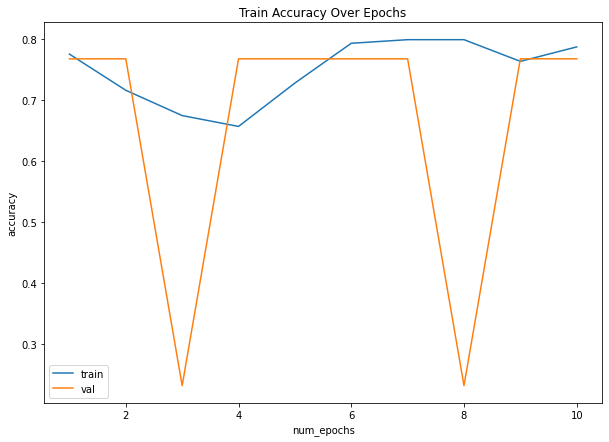

In [ ]:
# add acc
plt.figure(figsize=(10, 7))
plt.plot(np.linspace(1, len(epoch_train_acc), len(epoch_train_acc)), epoch_train_acc, label='train')
plt.plot(np.linspace(1, len(epoch_test_acc), len(epoch_test_acc)), epoch_test_acc, label='val')
plt.title('Train Accuracy Over Epochs')
plt.xlabel('num_epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

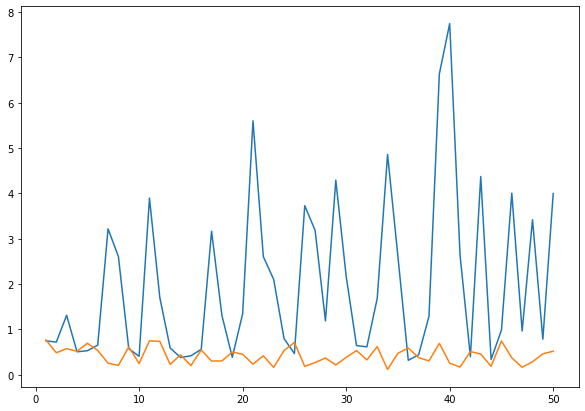

In [ ]:
## densenet121 + transformations ##
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(np.linspace(1, len(epoch_train_losses), len(epoch_train_losses)), [epoch_train_losses[i].tolist() for i in range(len(epoch_train_losses))])

plt.plot(np.linspace(1, len(epoch_test_losses), len(epoch_test_losses)), epoch_test_losses)
# np.linspace(1, len(losses), len(losses))

In [ ]:
## resnet18 + transformations ## NOT RUN YET.
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(np.linspace(1, len(epoch_train_losses), len(epoch_train_losses)), [epoch_train_losses[i].tolist() for i in range(len(epoch_train_losses))])

plt.plot(np.linspace(1, len(epoch_test_losses), len(epoch_test_losses)), epoch_test_losses)


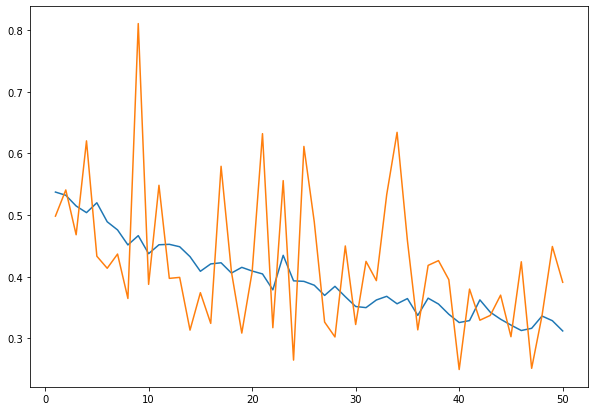

In [ ]:
## resnet18 + no horizontalflip or crop ##
# DO NOT RE-RUN!!!
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(np.linspace(1, len(epoch_train_losses), len(epoch_train_losses)), [epoch_train_losses[i].tolist() for i in range(len(epoch_train_losses))])

plt.plot(np.linspace(1, len(epoch_test_losses), len(epoch_test_losses)), epoch_test_losses)
# np.linspace(1, len(losses), len(losses))



In [ ]:
## densenet121 + transformations ##
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            
            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
        
        print(f'Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}') 
  
print('Test accuracy^', check_accuracy(testloader, model))
print('Train accuracy^', check_accuracy(trainloader, model))

Got 10 / 43 with accuracy 23.26
Test accuracy^ None
Got 65 / 169 with accuracy 38.46
Train accuracy^ None


In [ ]:
## resnet18 + no horizontalflip or crop ##
# DO NOT RE-RUN!!!
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            
            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
        
        print(f'Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}') 
  
print('Test accuracy^', check_accuracy(testloader, model))
print('Train accuracy^', check_accuracy(trainloader, model))

Got 10 / 43 with accuracy 23.26
Test accuracy^ None
Got 65 / 169 with accuracy 38.46
Train accuracy^ None


In [ ]:
from torchviz import make_dot

make_dot(yhat, params=dict(list(model.named_parameters()))).render("resnet_torchviz", format="png")

In [ ]:
## Visualize + download resnet ## 
print( os.getcwd() )
print( os.listdir() )
from google.colab import files
#files.download( "resnet_torchviz.png" ) 

In [ ]:
from torch.utils.tensorboard import SummaryWriter
import numpy as np

writer = SummaryWriter()

for n_iter in range(100):
    writer.add_scalar('Loss/train', np.random.random(), n_iter)
    writer.add_scalar('Loss/test', np.random.random(), n_iter)
    writer.add_scalar('Accuracy/train', np.random.random(), n_iter)
    writer.add_scalar('Accuracy/test', np.random.random(), n_iter)

In [ ]:
## Inference ##
"""use model to predict labels of new images!"""


import matplotlib.pyplot as plt 

def inference(test_data):
  idx = torch.randint(1, len(test_data), (1,))
  sample = torch.unsqueeze(test_data[idx][0], dim=0).to(device)

  if torch.sigmoid(model(sample)) < 0.5:
    print("Prediction : No Finding")
  else:
    print("Prediction : Mass")


  plt.imshow(test_data[idx][0].permute(1, 2, 0))

inference(test_data)